Data loaded successfully!
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   

C:\Users\rkhus\AppData\Local\Temp\ipykernel_2600\3347152292.py:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)  # Filling missing embarked with mode


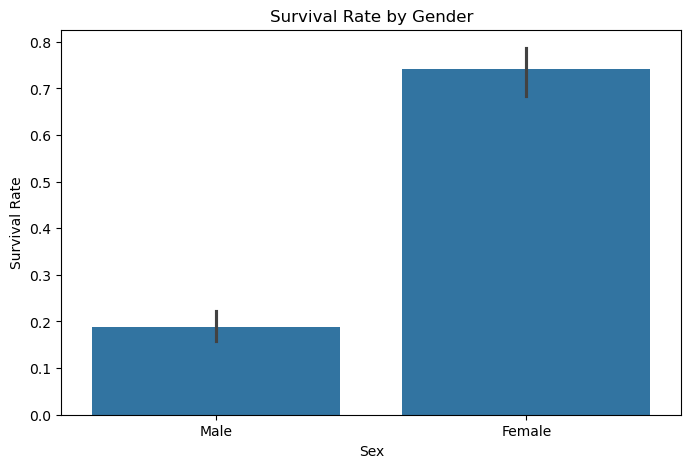

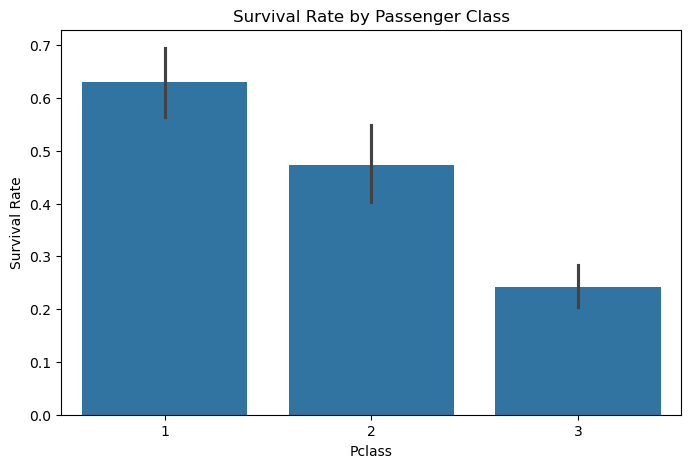

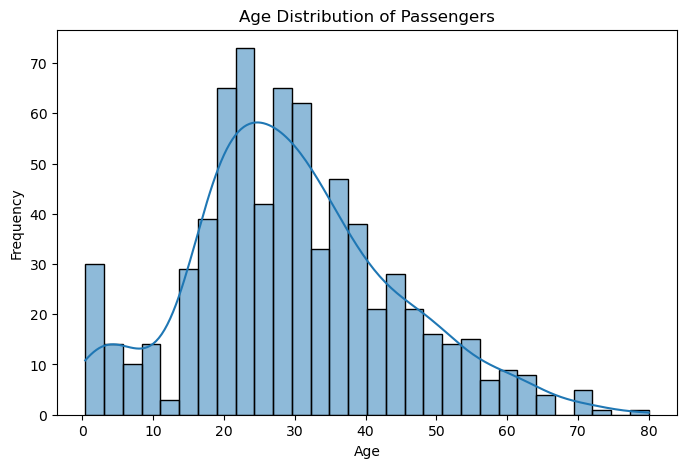

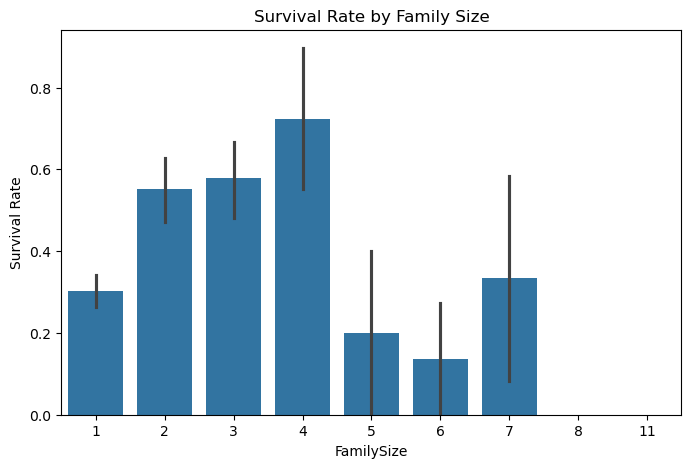

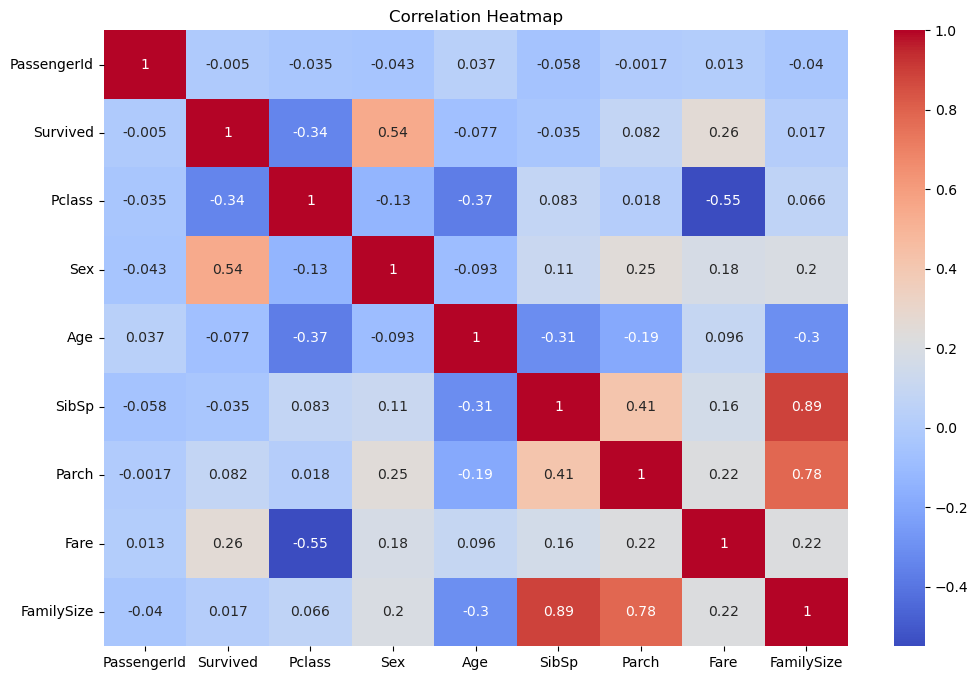

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# File path
file_path = r'C:\projects\Data Science Internship\PRODIGY_DS_02_EDA\data\train.csv'

# Load the dataset
try:
    data = pd.read_csv(file_path)
    print("Data loaded successfully!")
except Exception as e:
    print(f"Error reading the CSV file: {e}")
    exit()

# Data Overview
print(data.head())
print(data.info())

# Data Cleaning Steps
# 1. Handling missing values
data['Age'].fillna(data['Age'].median())  # Filling missing ages with median
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)  # Filling missing embarked with mode
data.drop(columns=['Cabin', 'Ticket'], inplace=True)  # Dropping irrelevant columns

# 2. Encoding categorical variables
data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})  # Encoding Sex

# 3. Creating new feature: Family Size
data['FamilySize'] = data['SibSp'] + data['Parch'] + 1  # Total family size

# Save cleaned data
cleaned_file_path = r'C:\projects\Data Science Internship\Task-02_EDA\data\cleaned_titanic_data.csv'
data.to_csv(cleaned_file_path, index=False)
print("Cleaned data saved successfully!")

# Exploratory Data Analysis
# 1. Survival Rate by Gender
plt.figure(figsize=(8, 5))
sns.barplot(x='Sex', y='Survived', data=data)
plt.xticks([0, 1], ['Male', 'Female'])
plt.title('Survival Rate by Gender')
plt.ylabel('Survival Rate')
plt.show()

# 2. Survival Rate by Pclass
plt.figure(figsize=(8, 5))
sns.barplot(x='Pclass', y='Survived', data=data)
plt.title('Survival Rate by Passenger Class')
plt.ylabel('Survival Rate')
plt.show()

# 3. Age Distribution of Passengers
plt.figure(figsize=(8, 5))
sns.histplot(data['Age'], bins=30, kde=True)
plt.title('Age Distribution of Passengers')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# 4. Survival Rate by Family Size
plt.figure(figsize=(8, 5))
sns.barplot(x='FamilySize', y='Survived', data=data)
plt.title('Survival Rate by Family Size')
plt.ylabel('Survival Rate')
plt.show()

# Correlation Heatmap (only for numeric columns)
plt.figure(figsize=(12, 8))
correlation_matrix = data.select_dtypes(include=['float64', 'int64']).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()
